Import the libraries

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import ttest_1samp 
from scipy.stats import ttest_ind

Read the file as a dataframe.

In [116]:
data = pd.read_csv('insurance.csv')
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


Shape

In [6]:
data.shape

(1338, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Data type of each attribute

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Checking the presence of missing values

In [10]:
data.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

5 point summary of numerical attributes

In [24]:
#data.describe(include='all') ### Both Categorical & Numerical 
data.describe() # Numerical Only

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

**BMI**

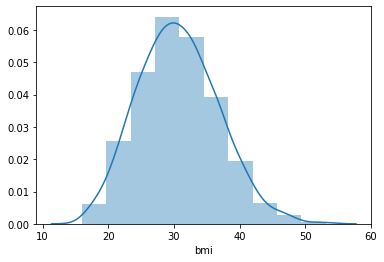

In [35]:
sns.distplot(data['bmi'],hist=True,bins=10,kde=True)

**AGE**

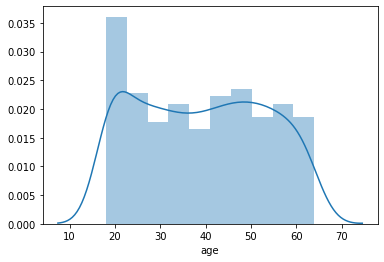

In [42]:
sns.distplot(data['age'],hist=True,bins=10,kde=True)

**CHARGES**

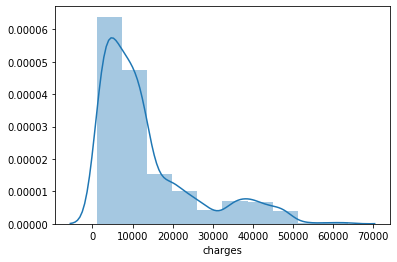

In [43]:
sns.distplot(data['charges'],hist=True,bins=10,kde=True)

Measure of skewness of ‘bmi’, ‘age’ and ‘charges’

**BMI**, **AGE**, **CHARGES**

In [59]:
data.skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Checking the presence of outliers in ‘bmi’, ‘age’ and
‘charges' columns

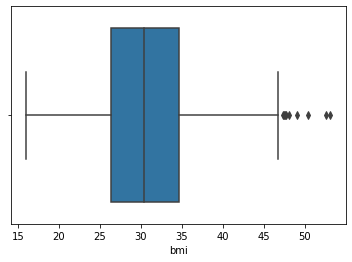

In [74]:
sns.boxplot(x="bmi",data=data)

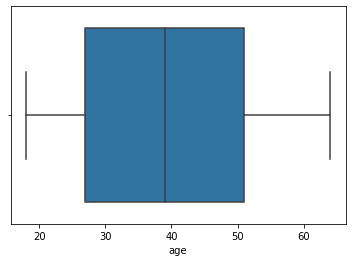

In [75]:
sns.boxplot(x="age",data=data)

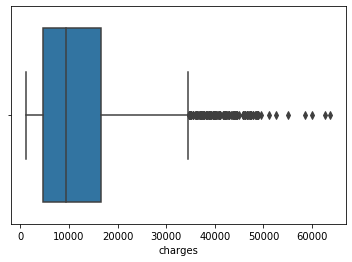

In [72]:
sns.boxplot(x="charges",data=data)

Distribution of categorical columns (include
children)

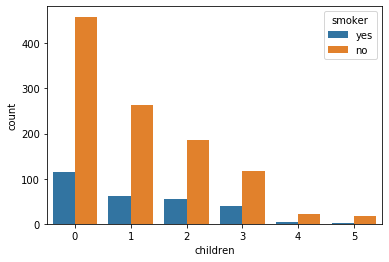

In [83]:
sns.countplot(x='children',data=data, hue='smoker')

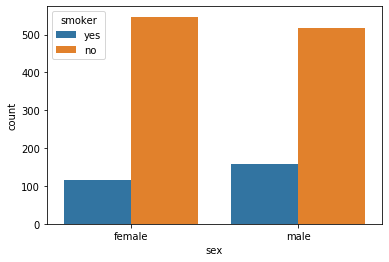

In [81]:
sns.countplot(x='sex',data=data,hue='smoker')

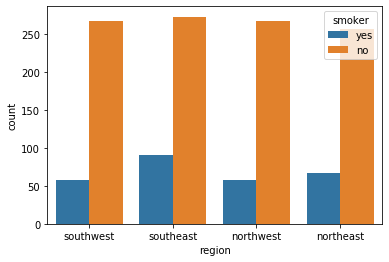

In [82]:
sns.countplot(x='region',data=data,hue='smoker')

Pair plot that includes all the columns of the data
frame

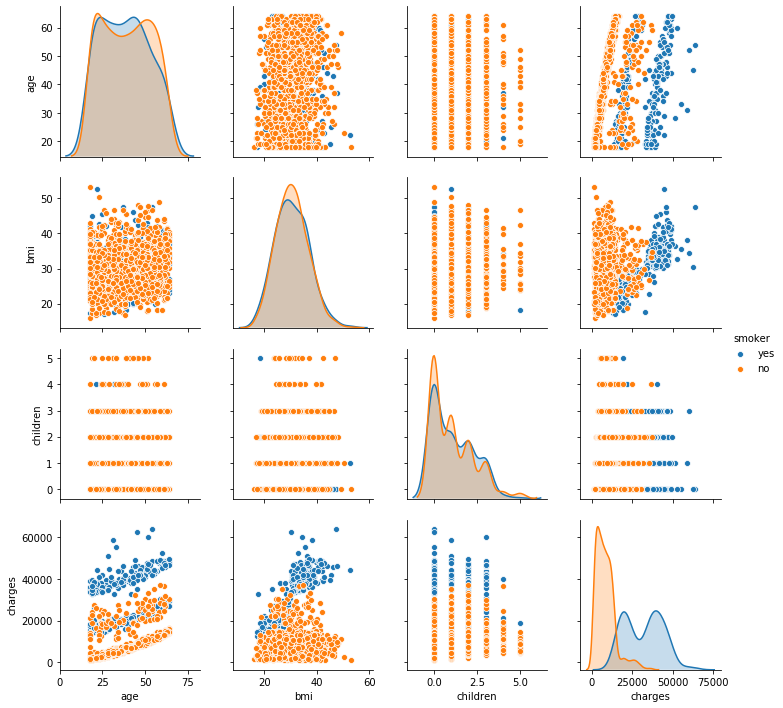

In [47]:
sns.pairplot(data, hue='smoker')

Do charges of people who smoke differ significantly
from the people who don't?

In [125]:
df_S = data.loc[data['smoker'] == 'yes'][['charges']]
df_NS = data.loc[data['smoker'] == 'no'][['charges']]    
df_charges = data['charges']

In [126]:
t_statistic, p_value  =  stats.ttest_ind(df_S,df_NS)
print(t_statistic, p_value)

[46.66492117] [8.27143584e-283]


Does bmi of males differ significantly from that of
females?

In [127]:
df_Male = data.loc[data['sex'] == 'male'][['bmi']]
df_Female = data.loc[data['sex'] == 'female'][['bmi']]   

list_M = list(df_Male['bmi'])
list_F = list(df_Female['bmi'])

t_statistic, p_value  =  stats.ttest_ind(list_M,list_F)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


Is the proportion of smokers significantly different
in different genders?

In [160]:
female_smokers = data[data['sex'] == 'female'].smoker.value_counts()
male_smokers = data[data['sex'] == 'male'].smoker.value_counts()
print(female_smokers)
print(male_smokers)

no     547
yes    115
Name: smoker, dtype: int64
no     517
yes    159
Name: smoker, dtype: int64


In [162]:
smoker_array = np.array([[547,115],[517,159]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(smoker_array)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1


Is the distribution of bmi across women with **no
children**, **one child** and **two children**, the same ?

In [165]:
no_child = data[data['children']==0][['bmi']]
one_child = data[data['children']==1][['bmi']]
two_child = data[data['children']==2][['bmi']]

stats.f_oneway(no_child, one_child, two_child)

F_onewayResult(statistic=array([0.41698293]), pvalue=array([0.65913309]))